# Introduction to Data Frames in R

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#What-is-a-Data-Frame?" data-toc-modified-id="What-is-a-Data-Frame?-2">What is a Data Frame?</a></span></li><li><span><a href="#CSVs" data-toc-modified-id="CSVs-3">CSVs</a></span></li><li><span><a href="#Loading-and-Saving-CSVs" data-toc-modified-id="Loading-and-Saving-CSVs-4">Loading and Saving CSVs</a></span></li><li><span><a href="#Inspecting-Data-Frames" data-toc-modified-id="Inspecting-Data-Frames-5">Inspecting Data Frames</a></span></li><li><span><a href="#Piping" data-toc-modified-id="Piping-6">Piping</a></span></li><li><span><a href="#Selecting-Columns" data-toc-modified-id="Selecting-Columns-7">Selecting Columns</a></span></li><li><span><a href="#Excluding-Columns" data-toc-modified-id="Excluding-Columns-8">Excluding Columns</a></span></li><li><span><a href="#Filtering-Rows-with-Logic-I" data-toc-modified-id="Filtering-Rows-with-Logic-I-9">Filtering Rows with Logic I</a></span></li><li><span><a href="#Filtering-Rows-with-Logic-II" data-toc-modified-id="Filtering-Rows-with-Logic-II-10">Filtering Rows with Logic II</a></span></li><li><span><a href="#Arranging-Rows" data-toc-modified-id="Arranging-Rows-11">Arranging Rows</a></span></li></ul></div>

### Introduction

The **dplyr** package in R is designed to make data manipulation tasks simpler and more intuitive than working with base R functions only.

**dplyr** and **readr** are part of the **tidyverse** (in itself a package), a collection of R packages designed for data science.

In [1]:
# import reader and dplyr packages

library(readr) # used to load data into R
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### What is a Data Frame?

A **data frame** is an R object that stores tabular data in a table structure made up of rows and columns. While data frames can be created in R, they are usually imported with data from a CSV, an Excel spreadsheet, or a SQL query.  

**Tibbles** are modern versions of data frames in R, and they operate in essentially the same way. The terms tibble and data frame are often used interchangebly.

### CSVs

One of the most common formats for big datasets is the CSV (<i>comma separated values</i>). It is a text-only spreadsheet format.<br><br>
The first row of a CSV contains column headings. All subsequent rows contain values. Each column heading and each value is separated by a comma:

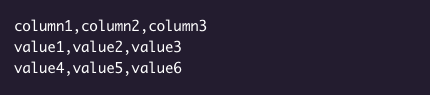

### Loading and Saving CSVs

To load a CSV file into a data frame (df):
```r
df <- read_csv('my_csv_file.csv')
```
To save data from a data frame (df) to a CSV file:
```r
write_csv(df, 'new_csv_file.csv')
```

### Inspecting Data Frames

* If a data frame is small, you can display it by typing its name:
```r
df
```
* To inspect a few rows of a data frame:
```r
head(df)
```
returns the first 6 rows<br><br>

* To see more rows:
```r
head(df,8)
```
will show the first 8 rows

The function, `summary(df)`, will return summary statistics such as mean, median, minimum and maximum for each numeric column while providing class and length information for non-numeric columns.

### Piping

The pipe operator, or `%>%`, helps increase the readability of data frame code by piping the value on its left into the first argument of the function that follows it.<br>  
**For example:**
```r
df %>% head()
```
pipes the data frame `df` into the first argument of `head()`, becoming:
```r
head(df)
```

**Note:** the pipe operator is not a part of base R. It is automatically loaded anytime a package from the tidyverse is loaded.

### Selecting Columns

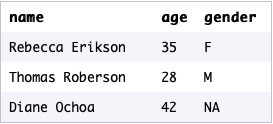

To select only the `age` and `gender` columns from the data frame called `customers`:
```r
select(customers, age, gender)
```
Alternatively, simplify the readability of your code by using the pipe:
```r
customers %>% select(age, gender)
```

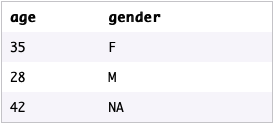

### Excluding Columns

Sometimes it's easier to exclude columns that you do not need for your analysis:
```r
customers %>% select(-name, -phone)
```

### Filtering Rows with Logic I

Dplyr's `filter()` function and comparison operators can be used to subset a data frame by rows.

Orders Data Frame
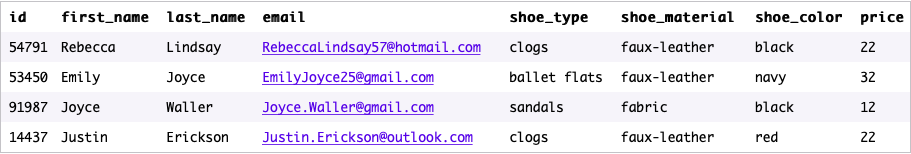

* Find all orders made by customers with the first name 'Joyce':
```r
orders %>% filter(first_name == 'Joyce')
```
* Find all orders made of faux-leather **AND** costing more than 25:
```r
orders %>% filter(shoe_material == 'faux-leather', price > 25)
```
<i>Output: a new data frame containing only the rows where both conditions are met is returned</i>

### Filtering Rows with Logic II

* Find all orders that were for `'clogs'` **OR** that cost less than `20`:
```r
orders %>% filter(shoe_type == 'clogs' | price < 20)
```
<i>Output: a new data frame containing only rows where `shoe_type` is `'clogs'` or `price` is less than `20`</i>  
  
  
* Find all orders where shoes in any color but **red** were purchased
```r
orders %>% filter(!(shoe_color == 'red'))
```
<i>Output: a new data frame containing only rows where `shoe_color` is not `'red'`</i>

### Arranging Rows

`arrange()` will sort the rows of a data frame in ascending order by the column provided as an argument.

* In the `orders` data frame, arrange the customers in ascending order by their `'last_name'`:
```r
orders %>% arrange(last_name)
```
* To arrange purchases in descending order by `'price'`:
```r
orders %>% arrange(desc(price))
```
<i>Note: `arrange()` can also accept multiple arguments</i>